In [1]:
from lib.Base64Converter import path_to_base64
from lib.Polygon import PolygonSet
from lib.SMILE import SMILE
import matplotlib.pyplot as plt

sss=SMILE("../input.png","../tout.png")

#sss.find_mouse()

#
#sss.tooth.polygons

c:\gits\SMILE\app\lib\SMILE


1 1048576 0
1 1048576 0
1 1048576 0
1 1048576 0
1 1048576 0
1 1048576 0


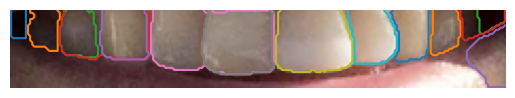

[array([[ 0,  0],
        [ 0, 12],
        [ 1, 13],
        [ 7, 13],
        [ 7,  0]], dtype=int32),
 array([[ 9,  0],
        [ 9,  1],
        [10,  1],
        [11,  2],
        [11,  3],
        [10,  4],
        [ 9,  4],
        [ 9,  6],
        [ 8,  7],
        [ 8, 11],
        [ 9, 12],
        [ 9, 14],
        [10, 15],
        [10, 16],
        [11, 17],
        [16, 17],
        [18, 19],
        [22, 19],
        [22,  5],
        [23,  4],
        [23,  1],
        [22,  0]], dtype=int32),
 array([[26,  0],
        [25,  1],
        [25,  2],
        [24,  3],
        [24,  7],
        [23,  8],
        [23, 16],
        [24, 17],
        [24, 19],
        [26, 21],
        [33, 21],
        [34, 22],
        [40, 22],
        [41, 21],
        [41, 17],
        [40, 16],
        [40,  7],
        [39,  6],
        [39,  1],
        [38,  0],
        [37,  1],
        [36,  0]], dtype=int32),
 array([[25,  0],
        [25,  2],
        [24,  3],
        [24,  7],
 

In [2]:
sss.find_all_tooth()
sss.tooth.polygons

In [4]:
len(sss.tooth.polygons)

15

In [12]:
sss.boximg.shape

(37, 234, 3)

In [3]:
sss.tooth.polygons

[array([[ 0,  0],
        [ 0, 12],
        [ 1, 13],
        [ 7, 13],
        [ 7,  0]], dtype=int32)]

In [1]:
from lib.Base64Converter import path_to_base64
from lib.Polygon import PolygonSet,Polygon
#from lib.SMILE import SMILE
import matplotlib.pyplot as plt

from skimage import io
import numpy as np
#from PIL import Image
import cv2
import mediapipe as mp
#from segment_anything 
from lib.segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import os
import json
import matplotlib.pyplot as plt
import sys

sys.path.append("..")
sam_checkpoint = f"{os.path.abspath(os.getcwd())}/lib/sam_vit_h_4b8939.pth"
model_type = "default"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(
    device='cuda'
    )
predictor = SamPredictor(sam)




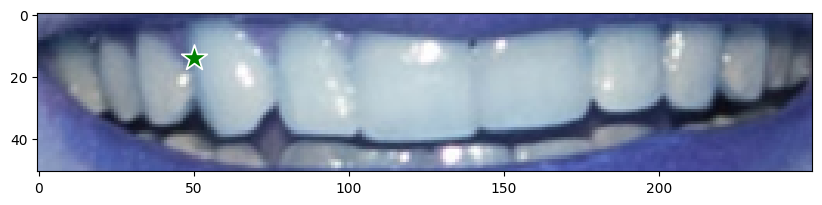

In [15]:
input_point=np.array([[50, 14]])
input_label=np.array([1])
def show_points(coords, labels, ax, marker_size=375):
    labels=np.array(labels)
    pos_points = np.array(coords[labels==1])
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

plt.figure(figsize=(10,10))
plt.imshow(sss.boximg)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show() 

32 0.9687402 0.052
32 0.9690924 0.052
30 0.9860212 0.072
31 0.98435307 0.072
31 0.97552514 0.072
26 0.96492684 0.072
39 0.99160576 0.108
39 0.9561219 0.108
39 0.9929499 0.108
38 0.9540417 0.108
39 0.99062985 0.108
36 0.9605303 0.108
39 0.9895502 0.108
38 0.9704807 0.108
36 0.96962166 0.108
39 0.9903913 0.108
38 0.9732169 0.108
40 0.9862846 0.108
39 0.99078995 0.108
38 0.9655911 0.108
42 0.9878718 0.108
35 0.9911222 0.1
36 0.9866876 0.1
33 0.98822236 0.1
31 0.98794687 0.1
33 0.9911558 0.1
31 0.98835164 0.1
29 0.9909842 0.1
29 0.9894758 0.1
32 0.9904457 0.1
29 0.98623216 0.1
37 0.99846154 0.156
37 0.99905425 0.156
37 0.998025 0.156
34 0.9987447 0.156
37 0.9973235 0.156
34 0.99812955 0.156
37 0.9985513 0.156
34 0.99780816 0.156
37 0.99958795 0.156
35 0.9982836 0.156
35 0.99838 0.156
35 0.9996508 0.156
37 0.9948918 0.156
35 0.99873245 0.156
34 0.99736965 0.156
36 0.99704105 0.156
31 0.9947043 0.144
31 0.9913692 0.144
31 0.9975284 0.144
31 0.99513453 0.144
31 0.9988964 0.144
31 0.9979269 0.

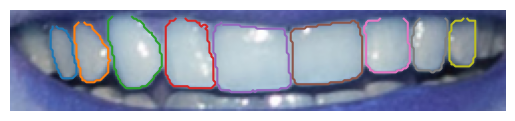

In [16]:
#from lib.PolygonSet import PolygonSet
plt.imshow(sss.boximg)

grid=np.array([pt-sss.box_pol for pt in np.array(sss.grid)])

def mask_to_pol(mask):
    mask=np.array(mask, dtype='uint8')

    contours, hierarchy = cv2.findContours(mask*255, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    h,w=mask.shape

    pol=contours[0].reshape(-1,2)
    #pol=[ [round(p[0]/w,3),round(p[1]/h,3)]  for p in pol]
    return np.array(pol)

def polygon_area(points):
    area = 0
    q = points[-1]
    for p in points:
        area += p[0] * q[1] - p[1] * q[0]
        q = p
    return int(abs(area / 2))


tooth=PolygonSet()

for pt in grid:
    

    masks, scores, logits = predictor.predict(
        point_coords=np.array([pt]),
        point_labels=np.array([1]),
        multimask_output=True,
    )
    
    for mask,score in zip(masks, scores):
        pp=mask_to_pol(mask)

        if score<0.95:
            continue

        if (max(pp[:,0])-min(pp[:,0]))/sss.boximg.shape[1]>0.2:
            continue

        if sss.boximg.shape[0]*sss.boximg.shape[1]/300>polygon_area(pp):
            continue


        print(len(pp),score,(max(pp[:,0])-min(pp[:,0]))/sss.boximg.shape[1])
        try:
            tooth.append(pp)
        except:
            pass
        
        """plt.imshow(nowfig.boximg)
        show_points(np.array([pt]), [1], plt.gca())
        plt.plot(pp[:,0],pp[:,1])
        #show_mask(mask, plt.gca(),random_color=True)
        plt.axis('on')
        plt.show() """

plt.imshow(sss.boximg)
for pol in tooth.polygons:
    plt.plot(pol[:,0],pol[:,1])
plt.axis('off')
plt.show()

In [101]:
import math
class Polygon:
    def __init__(self,arr):
        self.points=np.array(arr)
        self.n=len(self.points)
        self.area=self.count_area()
        self.box=[min(self.points[:,0]),max(self.points[:,0]),min(self.points[:,1]),max(self.points[:,1])]#lrud
        pass
    def isin(self,pt):
        def interpolate_x(y,p1,p2):
            if (p1[1]==p2[1] or y==p1[1]):
                return p1[0]
            return p1[0] + (p2[0] - p1[0]) * (y - p1[1]) / (p2[1] - p1[1])
        
        c=False
        tim=0
        for i in range(self.n):
            p1=self.points[i-1]
            p2=self.points[i]
            if ((p1[1]-pt[1]>0)^(p2[1]-pt[1]>0)) and (pt[0]-p1[0])*(p2[1]-p1[1])-(pt[1]-p1[1])*(p2[0]-p1[0])==0 :
                #print(pt)
                return True
        
            
            if ((p1[1]-pt[1]>0)^(p2[1]-pt[1]>0)) and pt[0]<interpolate_x(pt[1], p1, p2):
                #print(pt,interpolate_x(pt[1], p1, p2) )
                c=not c
                tim+=1
        #if tim in [0,1,2,3,5,7]:
            #return False
        return c


        
        """return np.array([Polygon([pt,self.points[i],self.points[(i+1)%self.n]]).area*self.area>=0 for i in range(self.n)]).all()"""
    
    def count_area(self):
        area = 0
        q = self.points[-1]
        for p in self.points:
            area += p[0] * q[1] - p[1] * q[0]
            q = p
        return -area / 2

    def show(self):
        x=self.points[:,0]
        y=self.points[:,1]
        if (self.points[-1]!=self.points[0]).any():
            x=np.append(x,x[:1])
            y=np.append(y,y[:1])
        #mask=np.zeros(self, np.uint8)
        plt.figure(figsize=(10,10))
        plt.axis('on')
        plt.plot(x,y,'black')
        plt.fill(x,y, 'r')


        plt.show()
        #plt.fill(self.points[:,0],self.points[:,1],'b',alpha=0.5)
        pass
    def expand(self,x):
        v1=[self.points[0][0]-self.points[-1][0],self.points[0][1]-self.points[-1][1]]
        l1=math.sqrt(v1[0]*v1[0]+v1[1]*v1[1])
        v2=[self.points[1][0]-self.points[0][0],self.points[1][1]-self.points[0][1]]
        l2=math.sqrt(v2[0]*v2[0]+v2[1]*v2[1])
        result=[]
        for i in range(self.n):
            q=[int(self.points[i][0]+x*(v1[0]/l1-v2[0]/l2)),int(self.points[i][1]+x*(v1[1]/l1-v2[1]/l2))]
            result.append(q)
            v1=v2
            l1=l2
            v2=[self.points[(i+2)%self.n][0]-self.points[(i+1)%self.n][0],self.points[(i+2)%self.n][1]-self.points[(i+1)%self.n][1]]
            l2=math.sqrt(v2[0]*v2[0]+v2[1]*v2[1])
        return Polygon(result)
    def gen_grid(self,l):
        result=[]
        #x,y=self.box[0],self.box[2]
        for x in np.arange(self.box[0], self.box[1], l):
            for y in np.arange(self.box[2], self.box[3], l):
                if self.isin([x,y]):
                    #print(self.isin([x,y]))
                    result.append([x,y])
        return np.array(result)
    def pol_to_mask(self):
            mask=np.zeros([1000,1000], np.uint8)
            #cv2.polylines(mask, np.int32([pol]), isClosed=True,color=1, thickness=1)
            cv2.fillPoly(mask,self.points,1)
            return mask

In [1]:
from .lib.Polygon import Polygon,PolygonSet
p=Polygon(sss.mouse[::-1])
#p.show()

plt.figure(figsize=(10,10))
grid=p.gen_grid(5)
plt.scatter(grid[:,0],grid[:,1])
plt.plot(sss.mouse[:,0],sss.mouse[:,1])

ImportError: attempted relative import with no known parent package

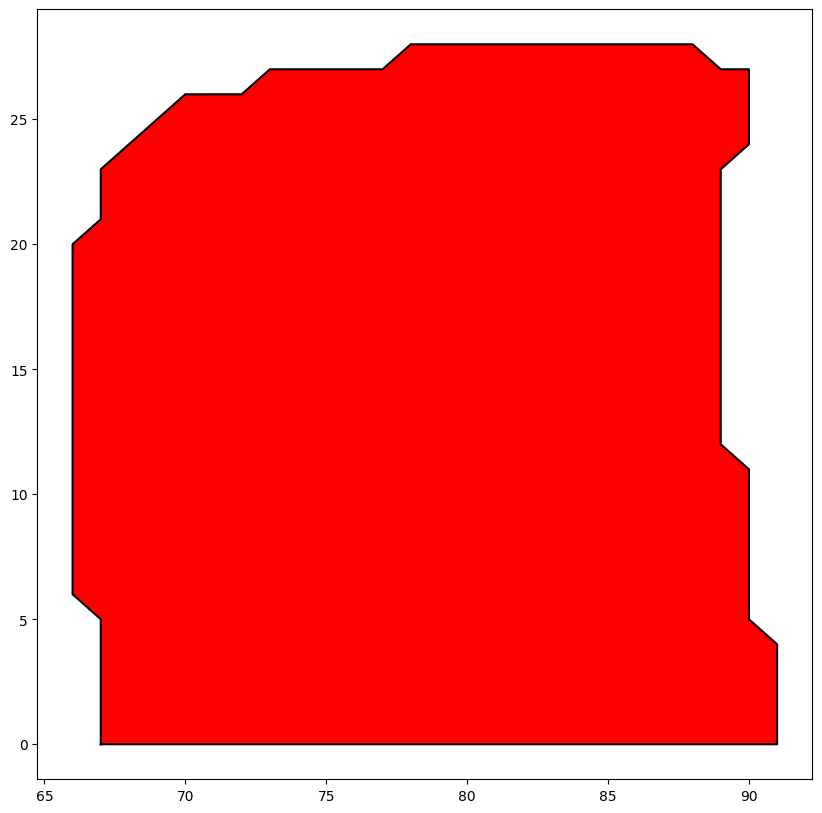

In [9]:
from lib.Polygon import Polygon,PolygonSet

pol=Polygon([[67 , 0], [67,  5], [66 , 6], [66, 20], [67 ,21], [67 ,23], [70 ,26], [72, 26], [73, 27], [77 ,27], [78 ,28], [88, 28], [89 ,27], [90 ,27], [90, 24], [89 ,23], [89 ,12], [90 ,11], [90 , 5], [91 , 4], [91 , 0]])
pol.area
pol.show()

In [94]:
pol.isin([0,0])

False

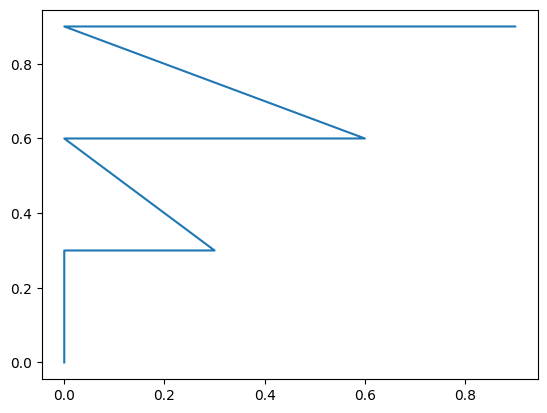

In [76]:
plt.plot(pol.gen_grid(0.3)[:,1],pol.gen_grid(0.3)[:,0])

In [77]:
pt=[1,2,3]
pt[::-1]

[3, 2, 1]